# Image

In [1]:
from PIL import Image
import requests
from io import BytesIO

import numpy as np

import wave
from IPython.display import Audio

In [2]:
url = "https://www.osadl.org/fileadmin/dam/images/tux-72.png"

response = requests.get(url)
response.raise_for_status()

img = Image.open(BytesIO(response.content)).convert("RGB")
print("Format:", img.format)
print("Size:", img.size)
print("Mode:", img.mode)

Format: None
Size: (249, 294)
Mode: RGB


In [3]:
message = "Супер секретне повідомлення"

data = np.array(img)  # shape: (h, w, 3)

msg_bytes = message.encode('utf-8') + b'\x00'
bits = np.unpackbits(np.frombuffer(msg_bytes, dtype=np.uint8))

print(f"Message length: {len(msg_bytes)} bytes ({len(bits)} bits)")

Message length: 53 bytes (424 bits)


In [4]:
bits

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,

In [5]:
bits.shape

(424,)

In [6]:
capacity = data.size  # кількість байтів (R,G,B)
print("capacity: ", capacity, " bytes")
if len(bits) > capacity:
    raise ValueError("Message is too long for this image!")

capacity:  219618  bytes


In [7]:
flat = data.flatten()
flat[0:10]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [8]:
flat[:len(bits)] = (flat[:len(bits)] & 0b11111110)
flat[0:20]

array([254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254], dtype=uint8)

In [9]:
flat[:len(bits)] = flat[:len(bits)] | bits
flat[0:20]

array([255, 255, 254, 255, 254, 254, 254, 254, 255, 254, 255, 254, 254,
       254, 254, 255, 255, 255, 254, 255], dtype=uint8)

In [10]:
flat.shape

(219618,)

In [11]:
stego = flat.reshape(data.shape)

array([[[255, 255, 254],
        [255, 254, 254],
        [254, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
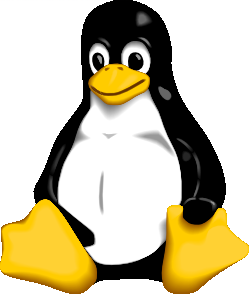

In [12]:
stego

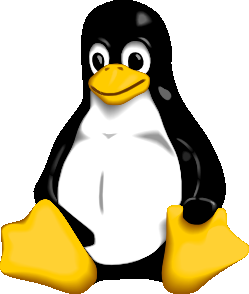

In [13]:
img

In [14]:
out_path = "/content/tux_stego.png"

Image.fromarray(stego.astype(np.uint8)).save(out_path)
print(f"Saved stego image as {out_path}")


Saved stego image as /content/tux_stego.png


In [15]:
out_path = "/content/tux_stego.png"

def extract_message(stego_img_path):
    img = Image.open(stego_img_path).convert("RGB")
    data = np.array(img).flatten()
    bits = data & 1
    bytes_out = np.packbits(bits)
    # знайдемо \x00
    end_idx = np.where(bytes_out == 0)[0]
    if len(end_idx) > 0:
        bytes_out = bytes_out[:end_idx[0]]
    return bytes(bytes_out).decode('utf-8', errors='ignore')

extracted = extract_message(out_path)
print("Extracted message:", extracted)

Extracted message: Супер секретне повідомлення


# Audio

In [16]:
url = "https://download.samplelib.com/wav/sample-3s.wav"
input_file = "/content/sample.wav"
output_file = "/content/sample_hidden.wav"
message = "Test message hidden in audio"

In [17]:
r = requests.get(url)
with open(input_file, "wb") as f:
    f.write(r.content)

In [18]:
with wave.open(input_file, "rb") as w:
    n_channels = w.getnchannels()
    sample_width = w.getsampwidth()
    framerate = w.getframerate()
    n_frames = w.getnframes()
    frames = w.readframes(n_frames)

In [19]:
print(f"Channels: {n_channels}, Sample width: {sample_width}, Frames: {n_frames}")

Channels: 2, Sample width: 2, Frames: 140928


In [20]:
samples = np.frombuffer(frames, dtype=np.int16)
samples.shape

(281856,)

In [21]:
url_text = "https://raw.githubusercontent.com/yefimov-d/Cryptography/refs/heads/master/Labs/data/sample_text.txt"
text_data = requests.get(url_text).text

data = text_data.encode("utf-8")
length = len(data)
bits = np.unpackbits(np.frombuffer(data, dtype=np.uint8))
print(f"Message bits: {len(bits)}")

Message bits: 274792


In [22]:
len(samples)

281856

In [23]:
if len(bits) > len(samples):
    raise ValueError("Message too long for this audio sample!")

In [24]:
samples_mod = samples.copy()
samples_mod[:len(bits)] = (samples_mod[:len(bits)] & ~1) | bits

In [25]:
with wave.open(output_file, "wb") as w:
    w.setnchannels(n_channels)
    w.setsampwidth(sample_width)
    w.setframerate(framerate)
    w.writeframes(samples_mod.tobytes())

In [26]:
print("✅ Hidden message saved in:", output_file)

✅ Hidden message saved in: /content/sample_hidden.wav


In [27]:
with wave.open(output_file, "rb") as w:
    frames = w.readframes(w.getnframes())

samples = np.frombuffer(frames, dtype=np.int16)
bits_extracted = samples[:len(bits)] & 1
bytes_extracted = np.packbits(bits_extracted)
decoded = bytes_extracted.tobytes().decode("utf-8", errors="ignore")

print("Extracted message:", decoded)

Extracted message: ЧАСТИНА ПЕРША

Яку розсказує Павлуша Завгородній. НАДЗВИЧАЙНІ ПРИГОДИ РОБІНЗОНА КУКУРУЗО ТА ЙОГО ВІРНОГО ДРУГА І ОДНОКЛАСНИКА ПАВЛУШІ ЗАВГОРОДНЬОГО В ШКОЛІ, ДОМА ТА НА БЕЗЛЮДНОМУ ОСТРОВІ ПОБЛИЗУ СЕЛА ВАСЮКІВКИ

РОЗДІЛ I. Метро під свинарником. Тореадори з Васюківки. Собакевич

— От знайдибіда, авантюрист шмаркатий! Ванько-о-о! Вилазь зараз же! Бо такого втру маку — тиждень чухатимешся! Вилазь, чуєш!

Ми лежимо в густих бур'янах за клунею, уткнувшись у землю носами, й не дихаємо.

— Вилазь, убоїще, бо гірше буде! Ти ж мене знаєш!

— Знаю, знаю, — ледь чутно зітхає, мій друг і нарешті наважується подати голос.

— Діду! — жалібно озивається він.

— Давай—давай!

— Діду, — ще жалібніше повторює мій друг, — ви одійдіть за хату, ми виліземо. Бо ж ви битиметесь.

— Вони ще мені умови ставлять, вишкварки! Ану вилазьте!

— Та ми ж не хотіли. Ми ж хотіли метро. Таке, як у Києві.

— Я вам дам метра! Я вам такого метра дам, що…

— Ми ж не знали. Ми зараз усе закидаємо — нічого й

In [28]:
Audio("sample.wav")

In [29]:
Audio("sample_hidden.wav")